[25, 48, 27, 42, 6, 1, 39, 13, 45, 22, 11, 16, 15, 41, 29, 25, 46, 44, 37, 27]
[(0, 6), (1, 4), (1, 5), (1, 9), (2, 7), (2, 8), (3, 4), (3, 5), (3, 10), (4, 5), (5, 10), (6, 12), (7, 16), (7, 17), (7, 18), (8, 10), (8, 15), (9, 15), (10, 11), (10, 14), (11, 19), (12, 13), (12, 14), (12, 15), (13, 19), (14, 19), (15, 19), (16, 19), (17, 19), (18, 19)]


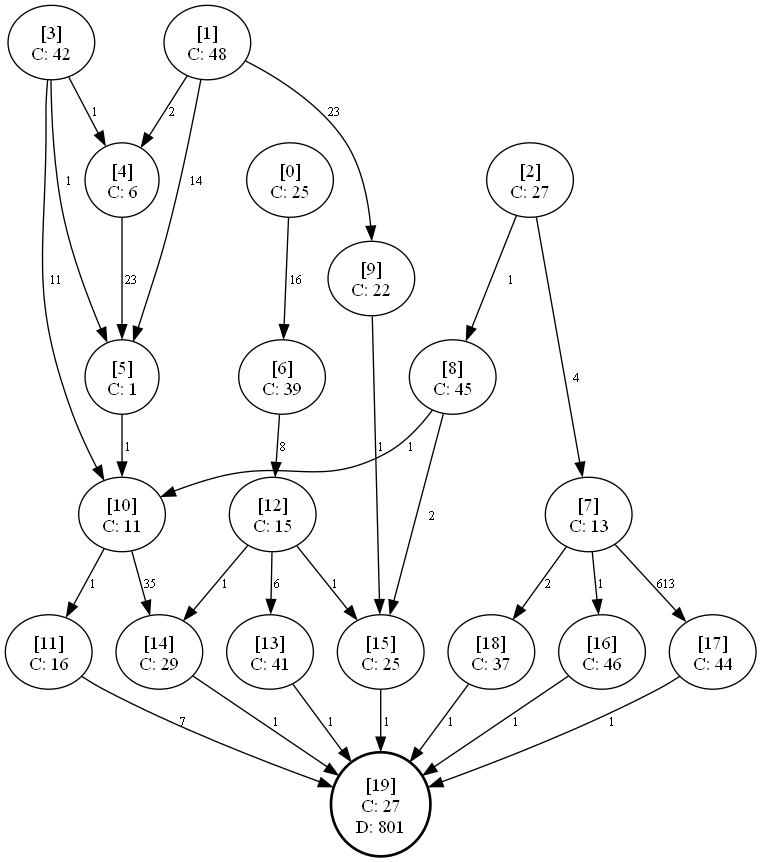

In [4]:
# 1. RD-Gen Reader
# 1. 1. Basic status of DAG

from src.dag_rd_gen import RDG_DAG

dag = RDG_DAG.load_from_rd_gen('./sample_input/dag_0.yaml')

print(dag.wcets)
print(dag.edges)

# dag.img.show() # for commandline
dag.img

In [7]:
# 1. 2. Graph status of DAG

print('pred of 19:', dag.pred(19))
print('succ of 1 :', dag.succ(1))

print()
print('paths')
for path in dag.paths:
    print(path)

pred of 19: [11, 13, 14, 15, 16, 17, 18]
succ of 1 : [4, 5, 9]

paths
[0, 6, 12, 13, 19]
[0, 6, 12, 14, 19]
[0, 6, 12, 15, 19]
[1, 4, 5, 10, 11, 19]
[1, 4, 5, 10, 14, 19]
[1, 5, 10, 11, 19]
[1, 5, 10, 14, 19]
[1, 9, 15, 19]
[2, 7, 16, 19]
[2, 7, 17, 19]
[2, 7, 18, 19]
[2, 8, 10, 11, 19]
[2, 8, 10, 14, 19]
[2, 8, 15, 19]
[3, 4, 5, 10, 11, 19]
[3, 4, 5, 10, 14, 19]
[3, 5, 10, 11, 19]
[3, 5, 10, 14, 19]
[3, 10, 11, 19]
[3, 10, 14, 19]


In [3]:
from src.data_file_util import RD_Gen_util
from src.dag import DAG
from src.scheduler import Scheduler
from src.assigner import Assigner
from random import randint
from glob import glob
from random import choice

chain_num = 10
chain_lengths = [randint(5, 10) for _ in range(chain_num)]

hist_data: list[int] = []

dags: list[DAG] = []
for i, chain_length in enumerate(chain_lengths):
    files = glob('./output/DAG/dag_*.yaml')
    dags.append(RD_Gen_util.load_dag(choice(files), RD_Gen_util.OPTION.RANDOM_GENERATED))
    print("\r" + f'{i} / {len(chain_lengths)} : {100*i/len(chain_lengths):.0f}%', end="")

ModuleNotFoundError: No module named 'src.data_file_util'

In [3]:
methods = ['dag-consider' , 'simple', 'packing'] # ['proposed', 'dag-consider', 'simple', 'packing']
core_nums = [20, 40, 60 ,80, 100]


In [4]:
from copy import deepcopy

def single_test(sample, args: dict):
    dag: DAG = deepcopy(sample)
    method: str = args['method']
    core_num: int = args['core_num']

    if method == 'proposed':
        assign_core_nums, core_map = Assigner.assign_cores(dag, core_num)
    elif method == 'simple':
        assign_core_nums, core_map = Assigner.simple_assign(dag, core_num)
    elif method == 'packing':
        assign_core_nums, core_map = Assigner.packing_assign(dag, core_num)
    elif method == 'dag-consider':
        assign_core_nums, core_map = Assigner.assign_cores(dag, core_num, True)

    for node, assign_core_num in zip(dag.nodes, assign_core_nums):
        node.task.core_num = assign_core_num

    dag.apply_driven()

    scheduling_length = 10000
    job_dict = Scheduler.scheduling(core_map, scheduling_length)

    for key, jobs in job_dict.items():
        dag.nodes[key].task.set_jobs(jobs)

    result = dag.worst_case_response_time
    return {**{'result': result, 'optional': {}}, **args}

In [44]:
array = [1,2,3]
args_list: list[dict] = [{}]

for name, parameter in parameters.items():
    args_list = [{**args, **{name: p}} for p in parameter for args in args_list]

result_list: list[dict] = []

loop_len = len(args_list)
for idx, args in enumerate(args_list):
    result_list.append(single_test(args))
    print("\r" + f'{idx} / {loop_len} : {100*idx/loop_len:.0f}%', end="")

1499 / 1500 : 100%[{'result': 1479, 'dag': <src.dag.DAG object at 0x00000289417DF160>, 'method': 'dag-consider', 'core_num': 20}, {'result': 1581, 'dag': <src.dag.DAG object at 0x0000028941CC92A0>, 'method': 'dag-consider', 'core_num': 20}, {'result': 1574, 'dag': <src.dag.DAG object at 0x0000028959D7C370>, 'method': 'dag-consider', 'core_num': 20}, {'result': 1320, 'dag': <src.dag.DAG object at 0x00000289419A06D0>, 'method': 'dag-consider', 'core_num': 20}, {'result': 1252, 'dag': <src.dag.DAG object at 0x0000028941999CF0>, 'method': 'dag-consider', 'core_num': 20}, {'result': 1381, 'dag': <src.dag.DAG object at 0x000002894199A0B0>, 'method': 'dag-consider', 'core_num': 20}, {'result': 1418, 'dag': <src.dag.DAG object at 0x0000028941998F40>, 'method': 'dag-consider', 'core_num': 20}, {'result': 1432, 'dag': <src.dag.DAG object at 0x0000028941999BD0>, 'method': 'dag-consider', 'core_num': 20}, {'result': 1370, 'dag': <src.dag.DAG object at 0x000002894199BFA0>, 'method': 'dag-consider',

In [ ]:
import json
import datetime

response_time_dict: dict[str, dict[int, list[int]]] = {}
for method in methods:
    for core_num in core_nums:
        response_time_dict[method[core_num]] = [r['result'] for r in result_list if r['core_num'] ==]

dt_now = datetime.datetime.now()

f = open(f'./output/data_list/compare/{dt_now:%y%m%d%H%M%S}.json', 'w+')
json.dump({'hue': methods, 'x': core_nums, 'data': response_time_dict}, f)
f.close()

In [17]:
def func(samples, **kwargs):
    args_list: list[dict] = [{}]
    for name, parameter in kwargs.items():
        args_list = [{**args, **{name: p}} for p in parameter for args in args_list]

    result_dict: dict = {}
    for args in args_list:
        r = result_dict
        for arg in args.values():
            if arg not in r:
                r[arg] = {}
            r = r[arg]

    return result_dict

print(func(dags, method=methods, core_num=core_nums))

{'a': [1327, 1592, 1492, 2093, 1776, 1034, 925, 1092, 1364, 1267]}
{'a': [1402, 1638, 1541, 2115, 1819, 1111, 990, 1092, 1369, 1312]}
{'a': [1402, 1638, 1541, 2115, 1819, 1111, 990, 1092, 1369, 1312]}
{'a': [1181, 1377, 1310, 1803, 1555, 903, 833, 917, 1174, 1075]}
{'a': [1402, 1638, 1541, 2115, 1819, 1111, 990, 1092, 1369, 1312]}
{'a': [1252, 1470, 1395, 1843, 1634, 983, 866, 973, 1233, 1168]}
{'a': [1141, 1352, 1300, 1714, 1506, 884, 830, 887, 1166, 1043]}
{'a': [1402, 1638, 1541, 2115, 1819, 1111, 990, 1092, 1369, 1312]}
{'a': [1191, 1398, 1344, 1766, 1572, 943, 829, 931, 1182, 1110]}
{'a': [1133, 1347, 1299, 1680, 1492, 880, 787, 877, 1136, 1032]}
{'a': [1402, 1638, 1541, 2115, 1819, 1111, 990, 1092, 1369, 1312]}
{'a': [1168, 1372, 1322, 1727, 1542, 922, 805, 917, 1162, 1081]}
{'a': [1131, 1344, 1298, 1663, 1490, 867, 786, 871, 1134, 1028]}
{'a': [1402, 1638, 1541, 2115, 1819, 1111, 990, 1092, 1369, 1312]}
{'a': [1155, 1356, 1311, 1698, 1519, 908, 796, 907, 1150, 1066]}
{'dag-consi